In [4]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.models import  load_model
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = load_model("../algorithm_implementation/model_3/Shrimp_model_3.h5")

In [34]:

def imageDetectior(img, labelName):
     # cv2 read image into BGR format.
    # plt.imshow(img) #but matplot show RGB format.  so we need to convert bgr to rgb
    # plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    # plt.show()

    # hilsqa
    lower = np.array([30,30,30])
    higher = np.array([170,200,200]) 

    mask = cv2.inRange(img, lower, higher)
    plt.imshow(mask, 'gray')
    plt.show()

    cont, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cont_img = cv2.drawContours(img,cont,-1,255,3)
    # plt.imshow(cont_img)
    # plt.show()

    c = max(cont, key=cv2.contourArea)  # find max countor
    x, y, w, h = cv2.boundingRect(c)
    img = cv2.rectangle(img, (x-20, y), (x + w -10, y+h+30), (255, 30,90), 3)  # (0,255,0),5 color and size
    img = cv2.putText(img, labelName, (x , y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 30,90), 3)  # 1 is font size
    plt.imshow(img)
    plt.savefig('Detected {}.jpg'.format(labelName))
    plt.show()


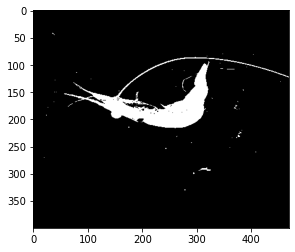

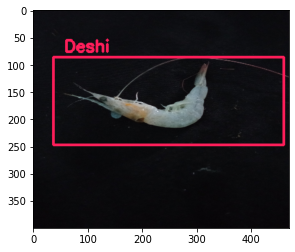

In [35]:

from tensorflow.keras.preprocessing import image
classes = ['Bagda', 'Deshi', 'Golda', 'Horina']
target_path = "deshi.jpg"  
##############input##############
img = image.load_img(target_path, target_size=(224,224))
img_fun = cv2.imread(target_path)
img_fun = cv2.resize(img_fun,(470,400))
img_array = image.img_to_array(img)/255
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
max_ind = np.argmax(prediction)
labelName = classes[max_ind]
imageDetectior(img_fun,labelName)

# print(realIndex)
# print(predictionIndex)
